Example 2.5
===========

This notebook is available on github
[here](https://github.com/aezarebski/aas-extended-examples). If you find
errors or would like to suggest an improvement, feel free to create an
issue.

As usual we will start by importing some useful libraries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In this notebook we will also use an additional module, `heatmap`, which provides a couple of functions for drawing heatmaps.

In [2]:
from heatmap import correlation_heatmap

The data in `data-auto.csv` is a popular dataset of car characteristics. In this notebook we will be looking at the miles per gallon (MPG) achieved by these cars based on some features of the cars and where/when they were produced. The `origin` of the car is encoded as an integer, (recall you can use the `dtypes` method to see this). The representation of the data is clearer by mapping it to a string describing the origin.

In [3]:
df = pd.read_csv("data-auto.csv")
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Japan'})

In [4]:
col_names = df.columns.to_list()
numeric_cols = col_names[0:7] 

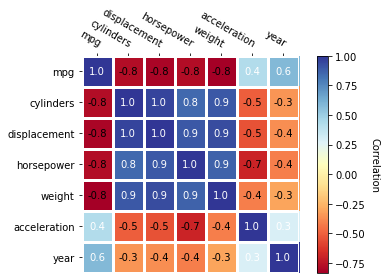

In [5]:
correlation_heatmap(df[numeric_cols])
plt.show()

/nix/store/smcqcgyvdgr2fab1z6mwa5w9a4ab7kkm-python3-3.8.9-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<Figure size 432x288 with 0 Axes>

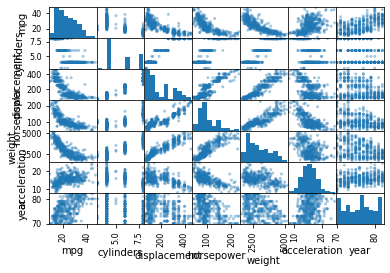

In [6]:
plt.figure()
pd.plotting.scatter_matrix(df[numeric_cols], alpha = 0.4)
plt.show()

### Question

Fit an ordinary linear regression for the MPG using all of the variables (excluding the name of the car). Print a summary of the fitted model. Comment on the results, how has the MPG changed over time?

### Answer

In [7]:
form_1 = 'mpg ~ ' + ' + '.join(col_names[1:8])

In [8]:
# May want to address the multicollinearity here but not sure.
# form_1 = form_1.replace(' + displacement', '').replace(' + horsepower', '')

In [9]:
# TODO Need to generate the diagnostic plots for the model fit but it is
# unclear how much of this we can do without them having seen it in lectures

fit_1 = smf.ols(formula = form_1, data = df).fit()

In [10]:
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          1.79e-139
Time:                        19:21:50   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -17.9546      4.677     -3.839      0.000     -27.150      -8.759
origin[T.Europe]     2.6300      0.566      4.643      0.000       1.516       3.744
origin[T.Japan]      2.8532      0.553      5.162      0.000       1.766       3.940
cylinders           -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement         0.0240      0.008      3.133      0.002       0.009       0.039
horsepower          -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight              -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration         0.0791      0.098      0.805      0.421      -0.114       0.272
year                 0.7770      0.052     15.005      0.000       0.675       0.879
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question

Did you get any warnings when you fitted the model? How might you resolve them?

### Answer

*TODO* include another model here where the multicollinearity is resolved.

### Question

Apply some transforms to reduce non-linearities in the relationship between the predictors and the response. Comment on how this has changed the model fit.

### Answer

In [11]:
form_2 = form_1.replace('weight', 'np.log(weight)').replace('acceleration', 'np.power(acceleration, 2)')

fit_2 = smf.ols(formula = form_2, data = df).fit()

fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     270.5
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          2.04e-152
Time:                        19:21:50   Log-Likelihood:                -989.87
No. Observations:                 392   AIC:                             1998.
Df Residuals:                     383   BIC:                             2033.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   137.7931     11.379     12.110      0.000     115.420     160.166
origin[T.Europe]              2.1735      0.524      4.151      0.000       1.144       3.203
origin[T.Japan]               1.9872      0.519      3.828      0.000       0.967       3.008
cylinders                    -0.4131      0.297     -1.391      0.165      -0.997       0.171
displacement                  0.0243      0.007      3.519      0.000       0.011       0.038
horsepower                   -0.0087      0.012     -0.717      0.474      -0.032       0.015
np.log(weight)              -22.6212      1.603    -14.112      0.000     -25.773     -19.469
np.power(acceleration, 2)     0.0053      0.003      2.050      0.041       0.000       0.010
year                          0.8168      0.048     16.986      0.000       0.722       0.911
==============================================================================
Omnibus:                       28.373   Durbin-Watson:                   1.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.899
Skew:                           0.458   Prob(JB):                     1.46e-11
Kurtosis:                       4.489   Cond. No.                     2.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question

Include an interaction term between the origin of the cars and their year or release. What does this tell you about car manufactoring in the considered regions?

### Answer

We see that Europe and Japan are improving their efficiency faster than America.

In [12]:
form_3 = form_2 + ' + origin * year'

fit_3 = smf.ols(formula = form_3, data = df).fit()

fit_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     227.3
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          8.36e-154
Time:                        19:21:50   Log-Likelihood:                -980.79
No. Observations:                 392   AIC:                             1984.
Df Residuals:                     381   BIC:                             2027.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   147.7484     11.395     12.966      0.000     125.343     170.153
origin[T.Europe]            -34.0479      9.487     -3.589      0.000     -52.701     -15.395
origin[T.Japan]             -22.9116      8.713     -2.630      0.009     -40.042      -5.781
cylinders                    -0.4535      0.291     -1.557      0.120      -1.026       0.119
displacement                  0.0200      0.007      2.913      0.004       0.006       0.033
horsepower                   -0.0074      0.012     -0.626      0.532      -0.031       0.016
np.log(weight)              -22.1625      1.575    -14.072      0.000     -25.259     -19.066
np.power(acceleration, 2)     0.0048      0.003      1.895      0.059      -0.000       0.010
year                          0.6529      0.062     10.581      0.000       0.532       0.774
origin[T.Europe]:year         0.4728      0.124      3.809      0.000       0.229       0.717
origin[T.Japan]:year          0.3195      0.112      2.854      0.005       0.099       0.540
==============================================================================
Omnibus:                       23.014   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.928
Skew:                           0.362   Prob(JB):                     7.86e-10
Kurtosis:                       4.429   Cond. No.                     2.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""